In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [9]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2,0.5,0.75] ## win rates of the Arm bandits(slot machines)


# Creating a class for the slot machine
class Bandit:
    def __init__(self, p): # p: probability of winning, a,b: beta parameters
        self.p = p
        self.a = 1
        self.b = 1
    def pull(self):
        return np.random.random() < self.p
    def sample(self): # sampling from it data (beta) distribution
        return np.random.beta(self.a,self.b)
    def update(self,x): # Updating a and b: Conjugate priors
        self.a += x
        self.b += 1-x 
        
def plot(bandits, trial): # for plotting the PDF of each bandit
    x = np.linspace(0, 1, 200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label="real p: %.4f" %b.p)
    plt.title("Bandit distributions after %s trials" % trial)
    plt.legend()
    plt.show()
    

def experiment(): # function to run these bandits and check which one gives the largest sample   
    
    #Initializing an array of bandits
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    sample_points = [5,10,20,50,100,200,500,1000,1500,1999] #trials
    for i in range(NUM_TRIALS):

        # take a sample from each bandit
        bestb = None #This is going to the bandit whose arm we would eventually pull
        maxsample = -1 # to keep a track of maxsample we got
        allsamples = [] # let's collect these just to print for debugging
        
        
        for b in bandits:
            sample = b.sample()
            allsamples.append("%.4f" % sample)
            
            if sample > maxsample:
                maxsample = sample
                bestb = b
            
        if i in sample_points:
            print("current samples: %s" % allsamples)
            plot(bandits, i)

        # pull the arm for the bandit with the largest sample
        x = bestb.pull()

        # update the distribution for the bandit whose arm we just pulled
        bestb.update(x)

        

current samples: ['0.6747', '0.0659', '0.7726']


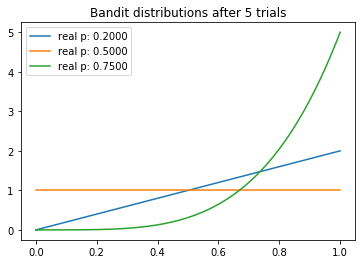

current samples: ['0.3914', '0.6690', '0.8632']


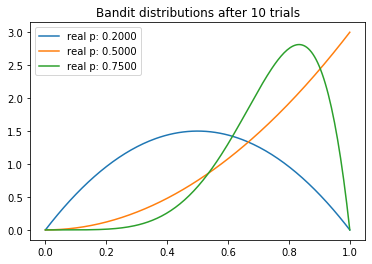

current samples: ['0.8657', '0.6576', '0.5590']


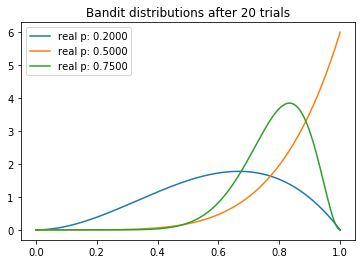

current samples: ['0.5532', '0.8203', '0.8964']


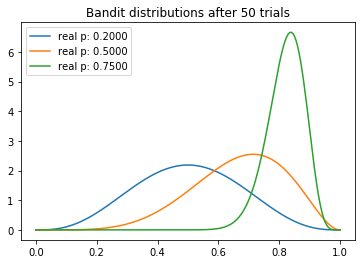

current samples: ['0.7721', '0.6153', '0.8106']


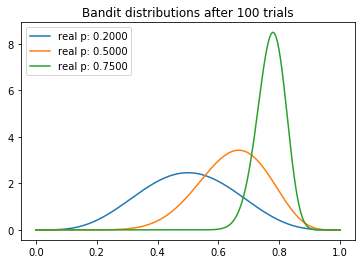

current samples: ['0.3771', '0.4527', '0.6512']


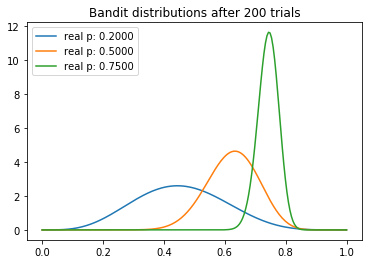

current samples: ['0.6357', '0.7263', '0.7669']


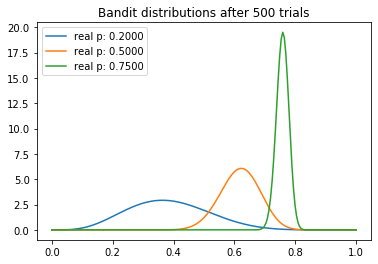

current samples: ['0.3991', '0.6748', '0.7731']


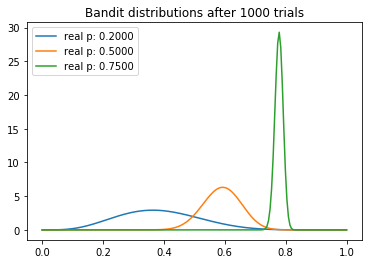

current samples: ['0.3928', '0.5782', '0.7452']


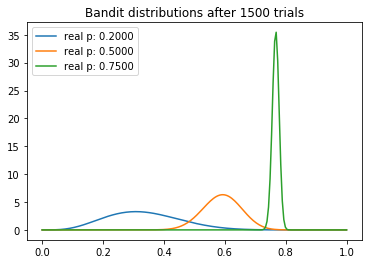

current samples: ['0.2790', '0.4981', '0.7498']


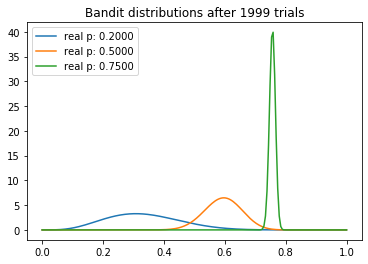

In [10]:
if __name__ == "__main__":
  experiment()

In [ ]:
# CONCLUSION: We can see that Bandit 3 has its distribution becoming sharper with more trials
#..... Sharper distribution -> Less variance -> Less exploration 
#.... Thus, arm3 can be exploited
#..... Also, Arm3 is the best performing arm because of the highest CTR


# We need NOT look into the other arms: 1 and 2 for exploration also
#..... Because though these have fatter variances and have scope for exploration, 
# ..... They still have less CTR's compared to the Arm3

# Let's blindly go for the Arm3 and exploit it!